In [5]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [3]:
# load the data set
df = pd.read_csv('/Users/balwiiredavis/Desktop/stores_sales_forecasting.csv',encoding='latin1')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.drop(['Row ID'], axis=1, inplace=True)

In [9]:
# Convert 'Order Date' and 'Ship Date' columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [20]:
print(df.describe())

        Postal Code        Sales     Quantity     Discount       Profit  \
count   2121.000000  2121.000000  2121.000000  2121.000000  2121.000000   
mean   55726.556341   349.834887     3.785007     0.173923     8.699327   
std    32261.888225   503.179145     2.251620     0.181547   136.049246   
min     1040.000000     1.892000     1.000000     0.000000 -1862.312400   
25%    22801.000000    47.040000     2.000000     0.000000   -12.849000   
50%    60505.000000   182.220000     3.000000     0.200000     7.774800   
75%    90032.000000   435.168000     5.000000     0.300000    33.726600   
max    99301.000000  4416.174000    14.000000     0.700000  1013.127000   

       Sales_Zscore  
count  2.121000e+03  
mean  -6.197567e-17  
std    1.000236e+00  
min   -6.916522e-01  
25%   -6.019055e-01  
50%   -3.331903e-01  
75%    1.696279e-01  
max    8.083201e+00  


In [21]:
# Set 'Order Date' as the index of the dataframe
df.set_index('Order Date', inplace=True)

In [22]:
# Resample the data to monthly frequency, summing up the sales
monthly_sales = df['Sales'].resample('M').sum()


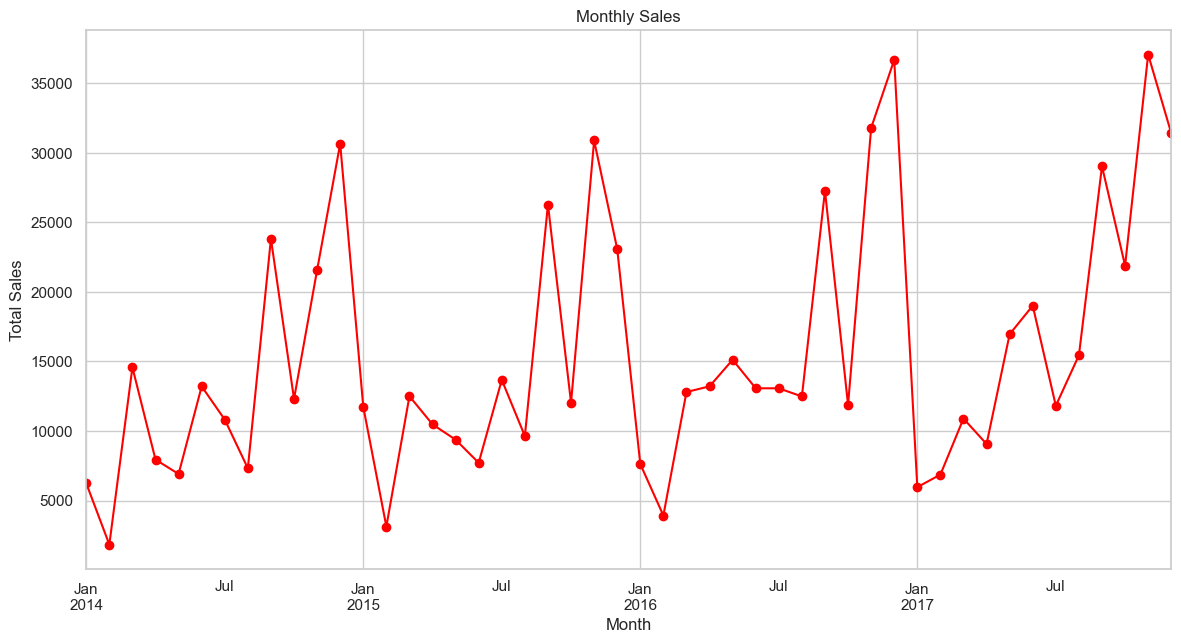

In [23]:
# Plotting the monthly sales trend
plt.figure(figsize=(14, 7))
monthly_sales.plot(title='Monthly Sales', color='red', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [24]:
# Resample the data to quarterly frequency, summing up the sales
quarterly_sales = df['Sales'].resample('Q').sum()

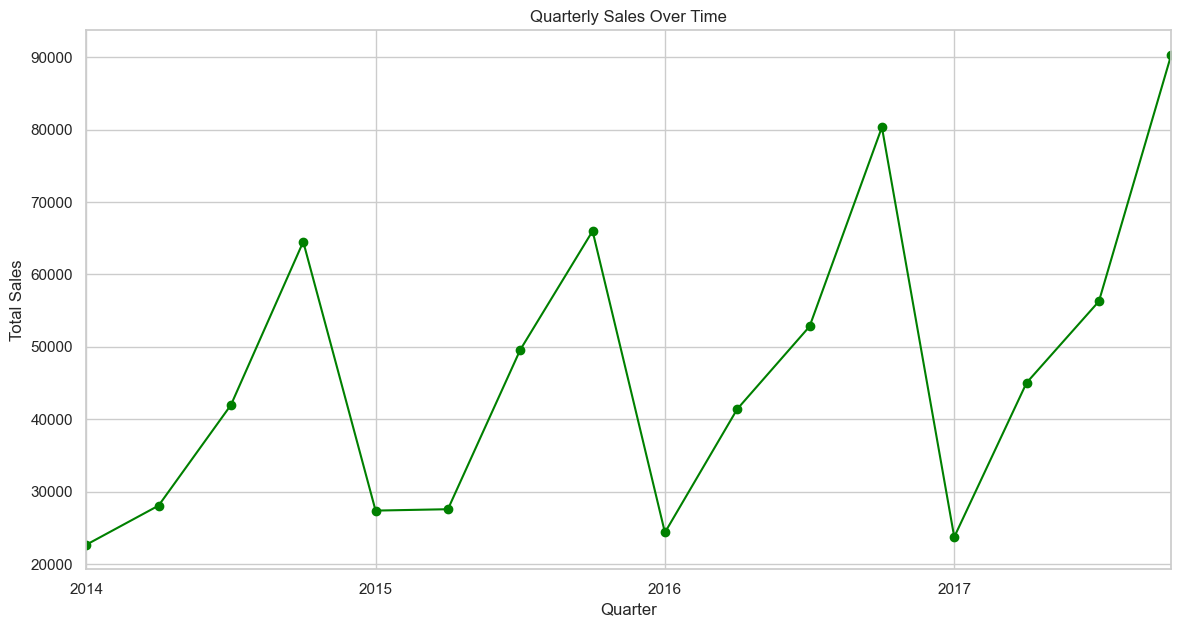

In [25]:
# Plotting the quarterly sales trend
plt.figure(figsize=(14, 7))
quarterly_sales.plot(title='Quarterly Sales Over Time', color='green', marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [26]:
# Resample the data to yearly frequency, summing up the sales
yearly_sales = df['Sales'].resample('A').sum()

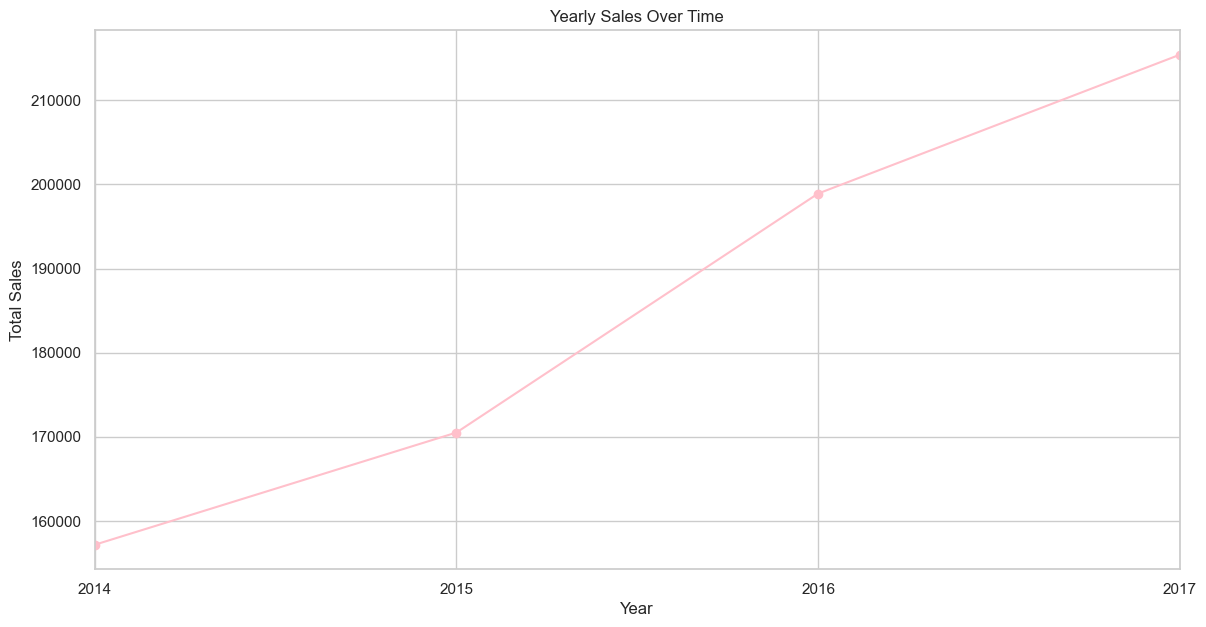

In [28]:
# Plotting the yearly sales trend
plt.figure(figsize=(14, 7))
yearly_sales.plot(title='Yearly Sales Over Time', color='pink', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [29]:
# Investigate seasonal patterns in sales data

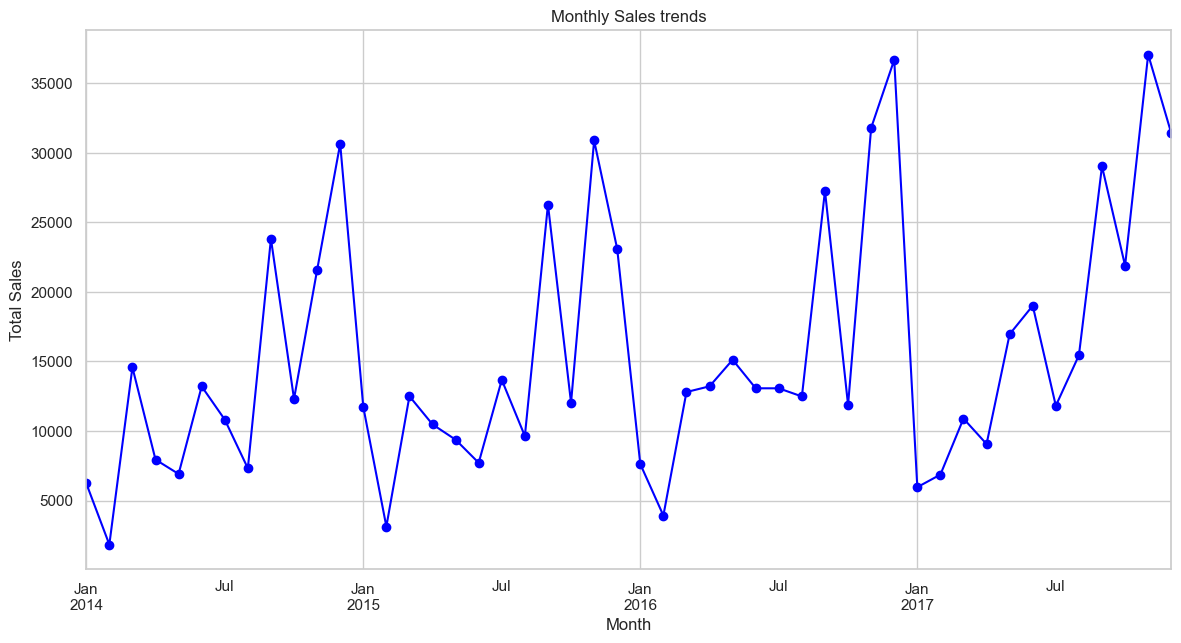

In [30]:
# Monthly sales pattern
monthly_sales = df['Sales'].resample('M').sum()
plt.figure(figsize=(14, 7))
monthly_sales.plot(title='Monthly Sales trends', color='blue', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

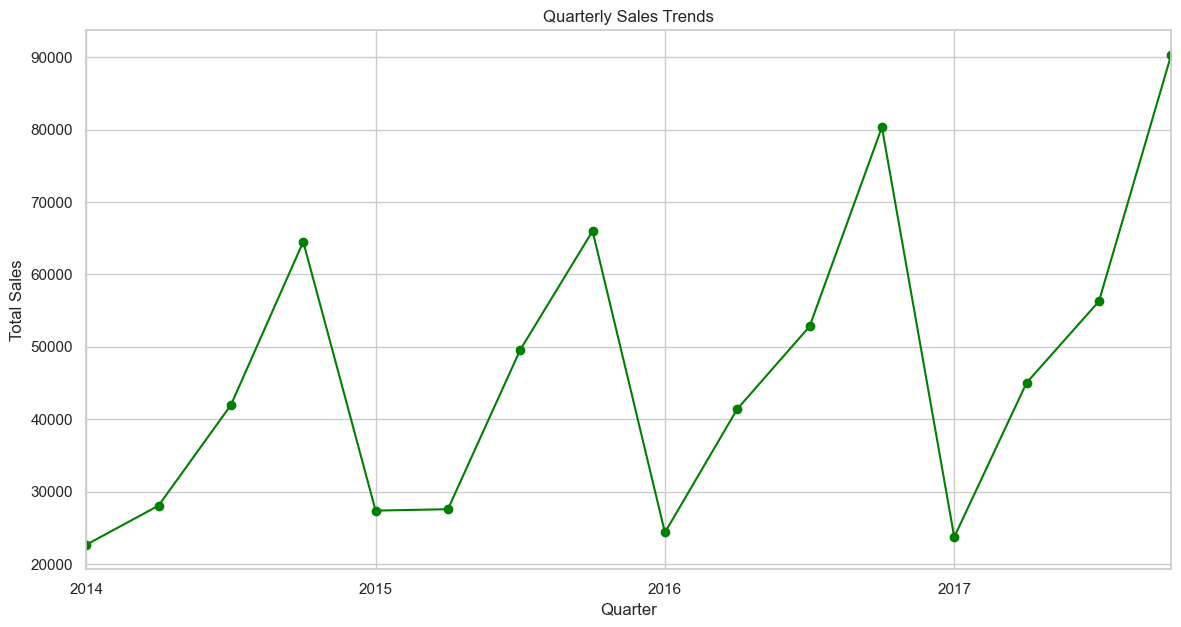

In [31]:
# Quarterly sales pattern
quarterly_sales = df['Sales'].resample('Q').sum()
plt.figure(figsize=(14, 7))
quarterly_sales.plot(title='Quarterly Sales Trends', color='green', marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

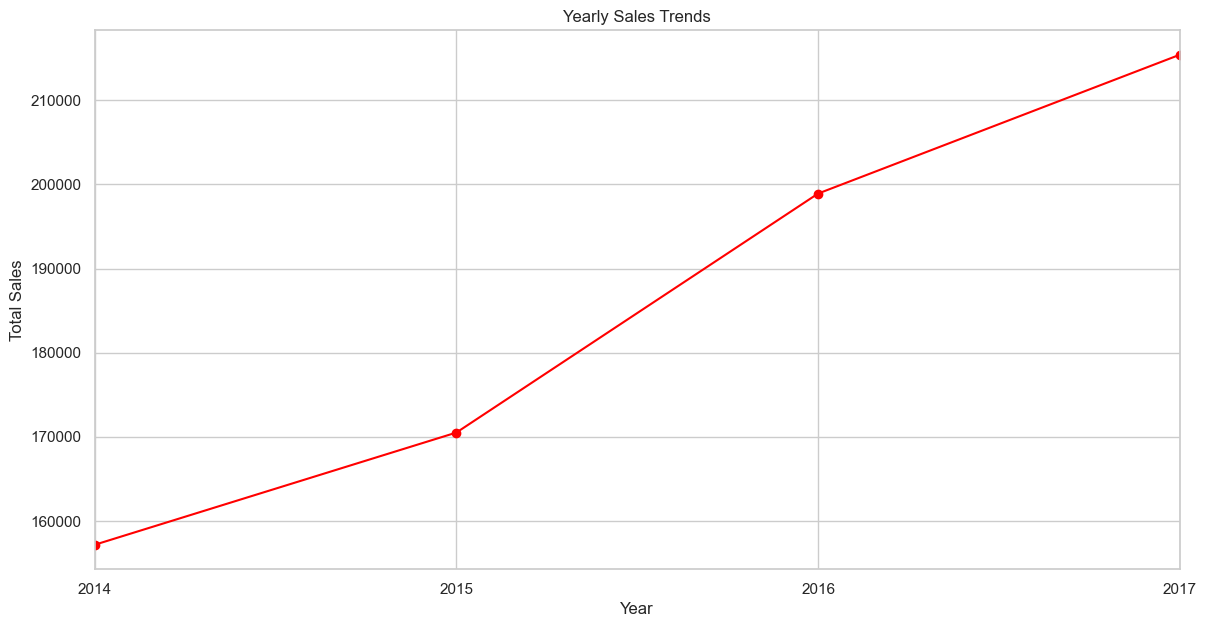

In [32]:
# Yearly sales pattern
yearly_sales = df['Sales'].resample('A').sum()
plt.figure(figsize=(14, 7))
yearly_sales.plot(title='Yearly Sales Trends', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [33]:
# To further investigate specific seasonal events like holidays or back-to-school seasons

In [35]:
# we will create a column for the month and analyze the average sales during these periods.
df['Month'] = df.index.month
monthly_avg_sales = df.groupby('Month')['Sales'].mean()

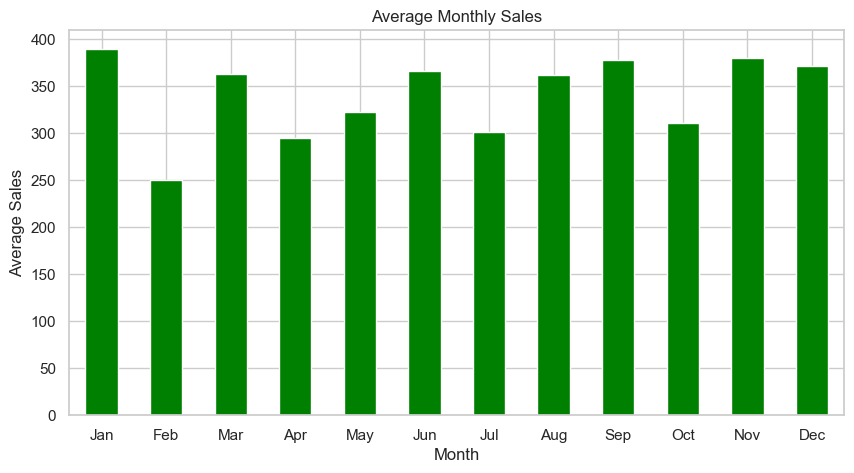

In [36]:
# Plotting the average monthly sales to identify peaks which might indicate seasonal trends
plt.figure(figsize=(10, 5))
monthly_avg_sales.plot(kind='bar', color='green')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

In [39]:
# more packages 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# get the column information
column_info = df.columns.tolist()

In [44]:
# Encode categorical variables
label_encoders = {}
for column in column_info:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [45]:
# Prepare features and target variable
X = df.drop(['Sales'], axis=1)
y = df['Sales']

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# the XGBoost regressor

In [48]:
# Initialize and train the XGBoost regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 6.410764718475619
R^2 Score: 0.9999704109182075


In [51]:
# RandomForestRegressor and Linear Regression Model

In [50]:
# Prepare additional models for comparison
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()

# Fit the models on the training data
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Print the evaluation metrics for each model
print("Random Forest Model:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R^2 Score: {rf_r2}")

print("\nLinear Regression Model:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R^2 Score: {lr_r2}")


Random Forest Model:
Mean Squared Error: 0.8312908235294071
R^2 Score: 0.9999961631516284

Linear Regression Model:
Mean Squared Error: 1.0594731255502177e-24
R^2 Score: 1.0


In [52]:
# Compare with the previously trained XGBoost model
print("\nXGBoost Model (from previous task):")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



XGBoost Model (from previous task):
Mean Squared Error: 6.410764718475619
R^2 Score: 0.9999704109182075


In [53]:
# Use the Linear Regression model to forecast future sales 

In [60]:
# We will create a simple function to predict sales for the next month based on historical data

def forecast_next_month_sales(model, df, date_column='Order Date'):
    # Assume the data has a datetime index
    last_date = df.index.max()
    next_month = last_date + pd.DateOffset(months=1)
    next_month = pd.date_range(start=next_month, periods=1, freq='M')
    
     # Create a DataFrame for the next month with the same structure
    future_data = df.iloc[-1:].copy()
    future_data.index = next_month
    
    # Predict using the model
    future_data_prepared = future_data.drop(['Sales'], axis=1)
    predicted_sales = model.predict(future_data_prepared)
    
    return predicted_sales[0]
    

In [61]:
# Predict sales for the next month using the lr_model
next_month_sales = forecast_next_month_sales(lr_model, df)
print(f"Forecasted Sales for the next month: {next_month_sales}")


Forecasted Sales for the next month: 570.9999999999994


In [62]:
average_monthly_sales = df['Sales'].resample('M').mean().mean()
inventory_adjustment_factor = 1.1 if next_month_sales > average_monthly_sales else 0.9


print(f"Average Monthly Sales: {average_monthly_sales}")
print(f"Inventory Adjustment Factor: {inventory_adjustment_factor}")


Average Monthly Sales: 789.692864562005
Inventory Adjustment Factor: 0.9


In [63]:
# Apply the inventory adjustment factor to the current inventory levels
current_inventory = df['Quantity'].resample('M').sum().iloc[-1]
adjusted_inventory = current_inventory * inventory_adjustment_factor
print(f"Current Inventory Level: {current_inventory}")
print(f"Adjusted Inventory Level for Next Month: {adjusted_inventory}")

Current Inventory Level: 288
Adjusted Inventory Level for Next Month: 259.2
